In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("spearman_corr.csv")
df_month

,May_6,May_8,May,April_2,December,March_2,November_3,May_7,November_5,June_4,...,July_3,October_2,January_5,August,July,August_4,March_4,December_2,February_4,April_3
0,0.313200,0.710976,0.359581,0.084560,-0.346315,-0.522800,-0.596723,0.578430,-0.333685,0.199451,...,0.686176,0.078281,-0.057003,0.114085,-0.181559,0.035055,-0.078047,0.002584,-0.251280,-0.307646
1,0.356062,0.826522,0.444494,0.053162,-0.346315,-0.360933,-0.596723,0.941395,-0.333685,0.199451,...,0.686176,0.078281,-0.184855,0.114085,-0.181559,0.035055,-0.049422,0.002584,-0.455797,-0.135091
2,0.599995,0.541607,0.006345,-0.243489,-0.433923,-0.236472,-0.485163,0.840295,-0.230423,0.097497,...,0.736187,0.116522,-0.131970,-0.180751,-0.341600,0.120072,-0.120937,0.595177,-0.301666,-0.084225
3,0.282180,0.865502,0.338369,-0.006795,-0.696828,-0.228254,-0.563371,0.522676,-0.278905,0.259793,...,1.035612,0.237922,-0.372445,0.051598,-0.178372,-0.124300,-0.032259,0.440662,-0.317349,0.173796
4,0.434114,0.557727,0.010838,-0.215218,-0.613563,-0.237256,-0.308393,-0.025233,-0.237242,0.167312,...,0.647763,0.027105,-0.325277,-0.148608,-0.276263,-0.110017,0.098653,0.076238,-0.412448,-0.343410
5,0.496766,0.673865,0.328808,-0.125061,-0.582546,-0.214241,-0.545654,0.565462,0.069225,0.663080,...,0.294249,0.520066,-0.168640,-0.166586,-0.125920,0.005020,-0.080749,0.151511,-0.251416,-0.316731
6,0.479629,0.327384,0.541366,0.224730,-0.629193,-0.044161,0.071710,0.048445,-0.480884,0.410829,...,0.295762,0.243838,0.291577,-0.054530,-0.194026,-0.304511,-0.027726,0.606251,-0.305620,-0.136670
7,0.324634,0.724865,0.268308,-0.037644,-0.197325,-0.516501,-0.275878,0.603642,-0.348002,0.582119,...,0.013378,0.253963,0.202162,-0.409823,-0.192533,0.140915,0.299648,0.298939,-0.083966,-0.154642
8,0.401587,0.655690,0.132932,-0.157339,-0.343663,-0.114679,-0.124376,0.419486,-0.111309,0.097035,...,0.322444,0.235986,0.278289,0.061791,-0.368761,-0.043944,-0.273505,0.598003,-0.166784,-0.271533
9,0.573596,0.711807,0.370820,-0.107566,-0.467842,-0.479743,-0.125701,0.164209,-0.167070,0.097207,...,0.415162,0.593156,0.132679,0.241229,-0.398708,0.027228,-0.183770,0.633548,-0.051378,-0.365294


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :20]
x_train = scaler.fit_transform(x_train)
x_train

array([[-5.79647404e-01,  5.83981349e-01,  8.87015495e-01,
         6.81641991e-01,  8.70065530e-01, -6.44124823e-01,
        -4.75959269e-01,  2.36555413e-01, -2.14436459e-01,
         3.75080472e-01,  9.55200634e-01, -7.26425378e-01,
        -1.30391073e+00, -6.78995022e-01, -2.57276936e-02,
         4.88791578e-01, -1.99899402e+00,  2.52318600e-01,
        -7.29720712e-02,  5.55236198e-01],
       [-3.81405603e-01,  1.11778529e+00,  1.33077281e+00,
         5.11376255e-01,  8.70065530e-01,  1.71042109e-02,
        -4.75959269e-01,  1.57288435e+00, -2.14436459e-01,
         3.75080472e-01, -1.20232704e-01, -1.91789077e-01,
        -2.10240451e-01,  1.83664418e+00, -2.57276936e-02,
         4.88791578e-01,  1.33889367e+00,  2.52318600e-01,
        -7.29720712e-02,  7.44810554e-03],
       [ 7.46835017e-01, -1.98474592e-01, -9.59004921e-01,
        -1.09729345e+00,  4.41207972e-01,  5.25528346e-01,
        -8.91444447e-02,  1.20066147e+00,  2.16136619e-01,
        -1.09732645e-01,  8.4

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] #df.iloc[43:]['avg']
    y_test.append(y_ts)

In [8]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [9]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

In [10]:
x_test = df_month.iloc[43:, :20]
x_test = scaler.fit_transform(x_test)
x_test

array([[ 0.32086694, -0.12167892, -0.30401138, -0.51707718, -0.85435037,
         0.28095709,  2.00232052, -1.92817251,  0.44688104, -0.10002055,
         1.65323597,  1.39862572,  0.76739706, -1.61818014,  0.73311563,
        -0.84936422, -0.83420181, -1.07868557,  2.29267476,  0.05701506],
       [ 0.0923005 ,  1.5878626 ,  0.86430999, -1.0850996 , -0.13144464,
        -1.93214909, -1.1928054 , -0.3487276 ,  0.43438104,  1.12079638,
        -0.54694298, -0.3075412 ,  0.76216246,  0.35718392, -0.44605376,
        -1.43613722,  0.19194289, -1.81360327, -0.89341662,  1.86633833],
       [-0.19414759, -1.76198836,  0.73752794, -0.09160704, -0.59433235,
         0.4448952 , -1.17877464, -0.59995164, -1.96149241, -0.65212718,
        -1.67349391,  0.5810525 , -1.26487796, -0.71510256,  1.74340186,
         1.15182489,  1.04523334, -0.12269122,  1.44084815,  0.30592664],
       [-0.61772835, -0.3850921 , -0.32621988,  0.59203959,  1.42066386,
        -1.14399541, -0.6678713 ,  0.40078695, -

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 47}
Best Score: 0.42253309052617855
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 39}
Best Score: 0.40654734853181906
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 47}
Best Score: 0.3281956418885598
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 33}
Best Score: 0.37588843857320464
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 48}
Best Score: 0.27696709059153657


In [13]:
y_pred_list

[array([-0.17704959,  0.51973081, -0.30062321,  0.18620793,  0.12201945,
        -0.21567009, -0.16216798, -0.49005257,  0.19747536, -0.34826163,
        -0.40707637, -0.29202647, -0.24748117,  0.29189377,  0.59105777,
         0.18407984]),
 array([-0.13721049,  0.34898184, -0.3585955 ,  0.49532925,  0.27338859,
        -0.3426089 , -0.06537937, -0.47371299,  0.13090745, -0.44435931,
        -0.6943313 , -0.22568282, -0.34592201,  0.30196795,  0.58370255,
        -0.0183126 ]),
 array([-0.21645771,  0.04922755, -0.40076621,  0.31829476,  0.13943987,
        -0.0706824 , -0.32981772, -0.32867019,  0.33704465, -0.28153089,
        -0.25783443, -0.24320649, -0.19276873,  0.01635141,  0.21756843,
         0.13263935]),
 array([ 0.09355479,  0.25504319, -0.28302095, -0.07382447,  0.14862436,
        -0.0774193 ,  0.05119134, -0.46015468,  0.3204526 , -0.32017969,
        -0.1732999 , -0.24102437, -0.18597682,  0.08363855,  0.3451694 ,
         0.28415831]),
 array([ 0.38673581,  0.79709852

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.7235947120741925,
 0.819488556719377,
 0.5768923146633955,
 0.45166441168972427,
 0.3495980435032038]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/20 predictors/spearson/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Air_Temperature (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/20 predictors/spearson/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/20 predictors/spearson/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'Air_Temperature Predicted vs Actual 20p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/20 predictors/spearson/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:
y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 47}
Best Score: 0.42253309052617855
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 39}
Best Score: 0.40654734853181906
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 47}
Best Score: 0.3281956418885598
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 33}
Best Score: 0.37588843857320464
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 48}
Best Score: 0.27696709059153657


In [21]:
y_pred_list_rf

[array([-0.17704959,  0.51973081, -0.30062321,  0.18620793,  0.12201945,
        -0.21567009, -0.16216798, -0.49005257,  0.19747536, -0.34826163,
        -0.40707637, -0.29202647, -0.24748117,  0.29189377,  0.59105777,
         0.18407984]),
 array([-0.13721049,  0.34898184, -0.3585955 ,  0.49532925,  0.27338859,
        -0.3426089 , -0.06537937, -0.47371299,  0.13090745, -0.44435931,
        -0.6943313 , -0.22568282, -0.34592201,  0.30196795,  0.58370255,
        -0.0183126 ]),
 array([-0.21645771,  0.04922755, -0.40076621,  0.31829476,  0.13943987,
        -0.0706824 , -0.32981772, -0.32867019,  0.33704465, -0.28153089,
        -0.25783443, -0.24320649, -0.19276873,  0.01635141,  0.21756843,
         0.13263935]),
 array([ 0.09355479,  0.25504319, -0.28302095, -0.07382447,  0.14862436,
        -0.0774193 ,  0.05119134, -0.46015468,  0.3204526 , -0.32017969,
        -0.1732999 , -0.24102437, -0.18597682,  0.08363855,  0.3451694 ,
         0.28415831]),
 array([ 0.38673581,  0.79709852

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.7235947120741925,
 0.819488556719377,
 0.5768923146633955,
 0.45166441168972427,
 0.3495980435032038]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/20 predictors/spearson/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Air_Temperature (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/20 predictors/spearson/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/20 predictors/spearson/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'Air_Temperature Predicted vs Actual 20p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/20 predictors/spearson/comparison plots/randomforest


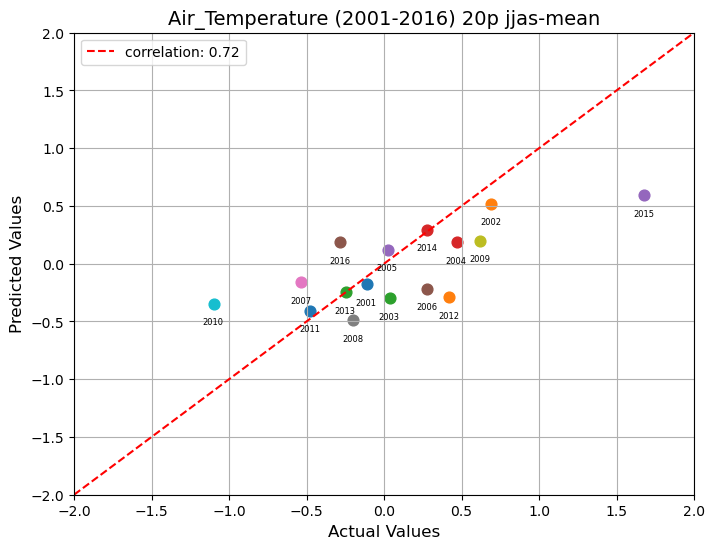

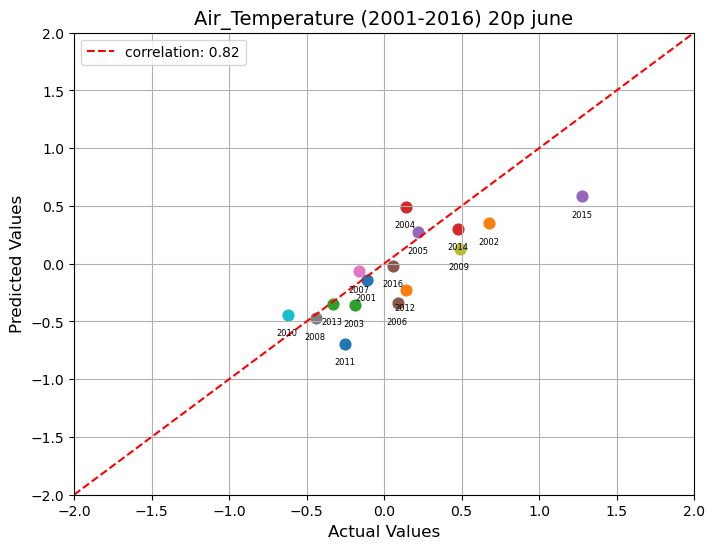

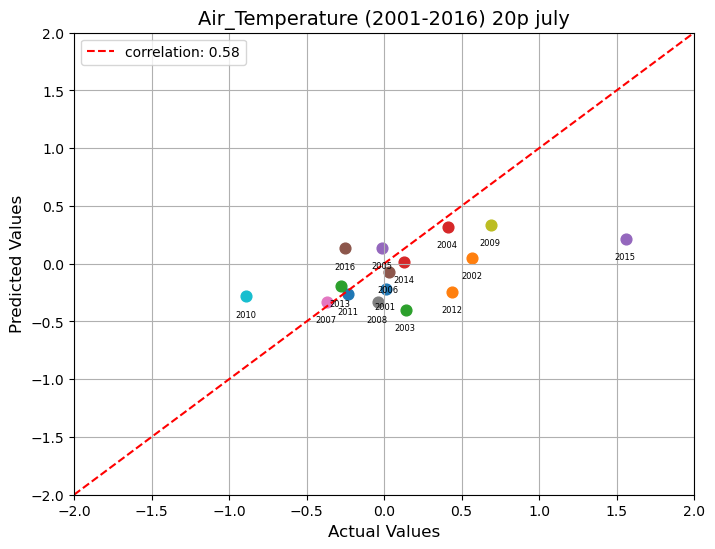

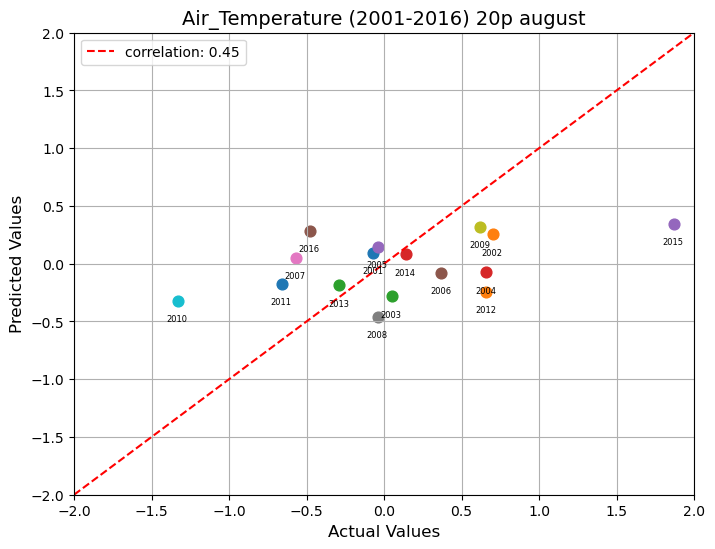

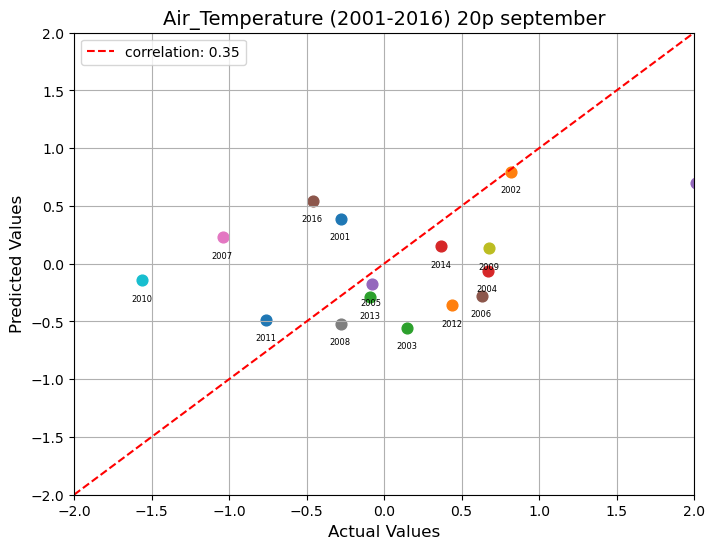

In [27]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=60)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Air_Temperature (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()